In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/grieve')


Mounted at /content/grieve


In [ ]:
df=pd.set_option('display.max_colwidth',100)
df

In [ ]:
df=pd.read_csv('/content/grieve/MyDrive/Colab Notebooks/project ml/fake news /test.csv')

df1=pd.read_csv('/content/grieve/MyDrive/Colab Notebooks/project ml/fake news /submit.csv')
df1

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1
...,...,...
5195,25995,0
5196,25996,1
5197,25997,0
5198,25998,1


In [ ]:
df['label']=df1['label']
df.dropna(inplace=True)

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords as s
wn=WordNetLemmatizer()
stop_words=s.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import string

In [ ]:
def clean_text(text):
  remov_pun=''.join([c for c in text if c not in string.punctuation])
  tokens=re.split('\W+',remov_pun)
  text=[ wn.lemmatize(word) for word in tokens if word not in stop_words]
  return text



In [ ]:
df['clean_text']=df['text'].apply(lambda x:clean_text(x.lower()))

In [ ]:
df.drop(['title','author','id'],axis='columns',inplace=True)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(analyzer=clean_text,ngram_range=(1,1))
x= tfidf_vect.fit_transform(df['text'])
print(x.shape)


(4575, 96837)


In [ ]:
y=df.label
y

0       0
2       0
3       1
4       1
6       1
       ..
5194    1
5195    0
5196    1
5197    0
5199    0
Name: label, Length: 4575, dtype: int64

In [ ]:
DF=pd.DataFrame(x.toarray(),columns=tfidf_vect.get_feature_names())
print(df)

                                                                                                     text  \
0     PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt i...   
2     Videos #NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police Amne...   
3     If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback...   
4     42 mins ago 1 Views 0 Comments 0 Likes 'For the first time in history, we’re filming a panoramic...   
6     Sunday on NBC’s “Meet the Press,” House Minority Leader Rep. Nancy Pelosi ( )  called for a FBI ...   
...                                                                                                   ...   
5194  Pres. Trump on if “tapes” exist of his conversations with Comey: ”Well, I’ll tell you about that...   
5195  Of all the dysfunctions that plague the world’s megacities, none may be more pernicious than bad...   
5196  WASHINGTON  —

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=10,train_size=0.6)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score,recall_score,auc,roc_curve,f1_score
from sklearn.model_selection import train_test_split



In [ ]:
names=["KNN","Linear_SVM","RBF_SVM","Decision Tree","RFC","MultinomialNB" ,"PassiveAggressiveClassifier","Logistic"]

In [ ]:
classifier=[KNeighborsClassifier(3),
            SVC(kernel='linear',C=1),
            SVC(kernel='rbf',C=8),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            MultinomialNB(),
            PassiveAggressiveClassifier(),
            LogisticRegression()]


In [ ]:
model_column=[ ]
DF=pd.DataFrame(columns=model_column)
index=0
for name,clf in zip(names,classifier):
  clf.fit(x_train,y_train)
  DF.loc[index,'classifier']=name
  DF.loc[index,'Train_Accuracy']=clf.score(x_train,y_train)
  DF.loc[index,'Test_Accuracy']=clf.score(x_test,y_test)
  DF.loc[index,'Precision']=precision_score(y_test,clf.predict(x_test))
  DF.loc[index,'Recall']=recall_score(y_test,clf.predict(x_test))
  DF.loc[index,'f1']=f1_score(y_test,clf.predict(x_test))


  index+=1

In [ ]:
DF.describe()

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.926685,0.812773,0.859526,0.757201,0.775622
std,0.117690,0.113168,0.052926,0.261216,0.194173
min,0.692896,0.606011,0.782531,0.228261,0.368098
25%,0.904554,0.801230,0.839306,0.747826,0.782257
50%,0.992168,0.853825,0.846792,0.868478,0.857211
75%,1.000000,0.865574,0.870386,0.906793,0.869830
max,1.000000,0.940984,0.950226,0.963043,0.942553


In [ ]:
DF

,classifier,Train_Accuracy,Test_Accuracy,Precision,Recall,f1
0,KNN,0.795264,0.670492,0.782531,0.477174,0.592843
1,Linear_SVM,0.984335,0.865027,0.849429,0.889130,0.868826
2,RBF_SVM,1.000000,0.867213,0.841574,0.906522,0.872841
3,Decision Tree,1.000000,0.844809,0.844156,0.847826,0.845987
4,RFC,1.000000,0.940984,0.922917,0.963043,0.942553
5,MultinomialNB,0.692896,0.606011,0.950226,0.228261,0.368098
6,PassiveAggressiveClassifier,1.000000,0.845902,0.852876,0.838043,0.845395
7,Logistic,0.940984,0.861749,0.832502,0.907609,0.868435


Text(0.5, 1.0, 'Model Train_Accuracy Comparison')

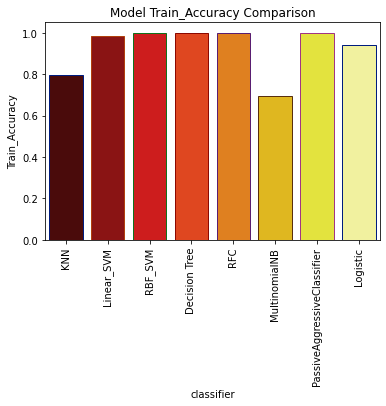

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Train_Accuracy',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train_Accuracy Comparison')

Text(0.5, 1.0, 'Model est_Accuracy Comparison')

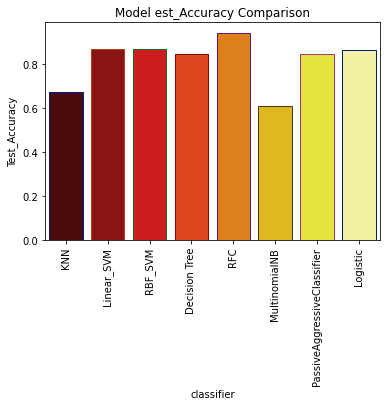

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Test_Accuracy',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model est_Accuracy Comparison')

Text(0.5, 1.0, 'Model Recall Comparison')

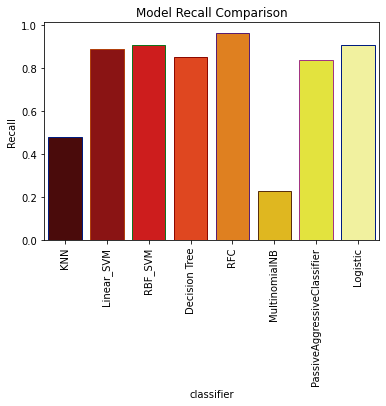

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Recall',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparison')

Text(0.5, 1.0, 'Model f1 score Comparison')

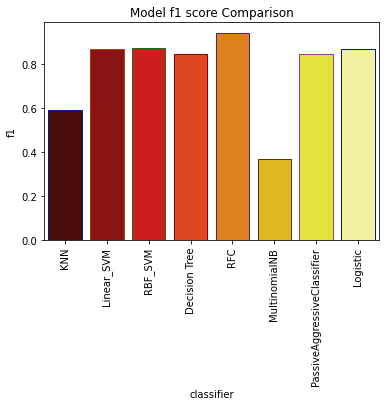

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='f1',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model f1 score Comparison')

Text(0.5, 1.0, 'Model Precision Comparison')

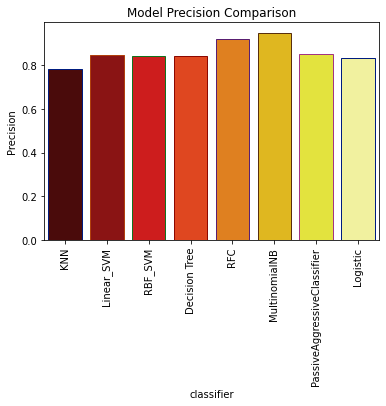

In [ ]:
import seaborn as sns
sns.barplot(x='classifier',y='Precision',data=DF,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparison')

Text(0.5, 1.0, 'classifier vs Train_Accuracy,Test_Accuracy\nPrecision and Recall')

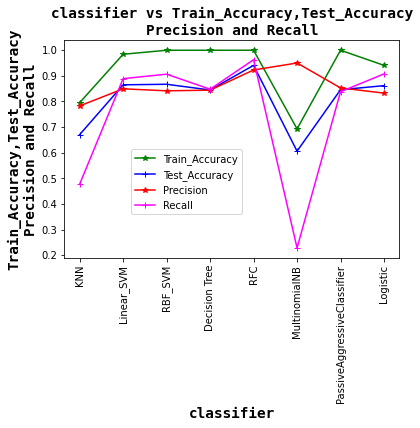

In [ ]:
d={'fontfamily':'monospace','fontweight':'bold','fontsize':"x-large"}
plt.plot(DF.classifier,DF.Train_Accuracy,marker="*",color='green',label='Train_Accuracy')
plt.plot(DF.classifier,DF.Test_Accuracy,marker="+",color='blue',label='Test_Accuracy')
plt.plot(DF.classifier,DF.Precision,marker="*",color='red',label='Precision')
plt.plot(DF.classifier,DF.Recall,marker="+",color='magenta',label='Recall')
plt.ylabel('Train_Accuracy,Test_Accuracy\nPrecision and Recall',fontdict=d)
plt.xlabel('classifier',fontdict=d)
plt.legend(loc=[0.2,0.2])
plt.xticks(rotation=90)
plt.title('classifier vs Train_Accuracy,Test_Accuracy\nPrecision and Recall',fontdict=d)

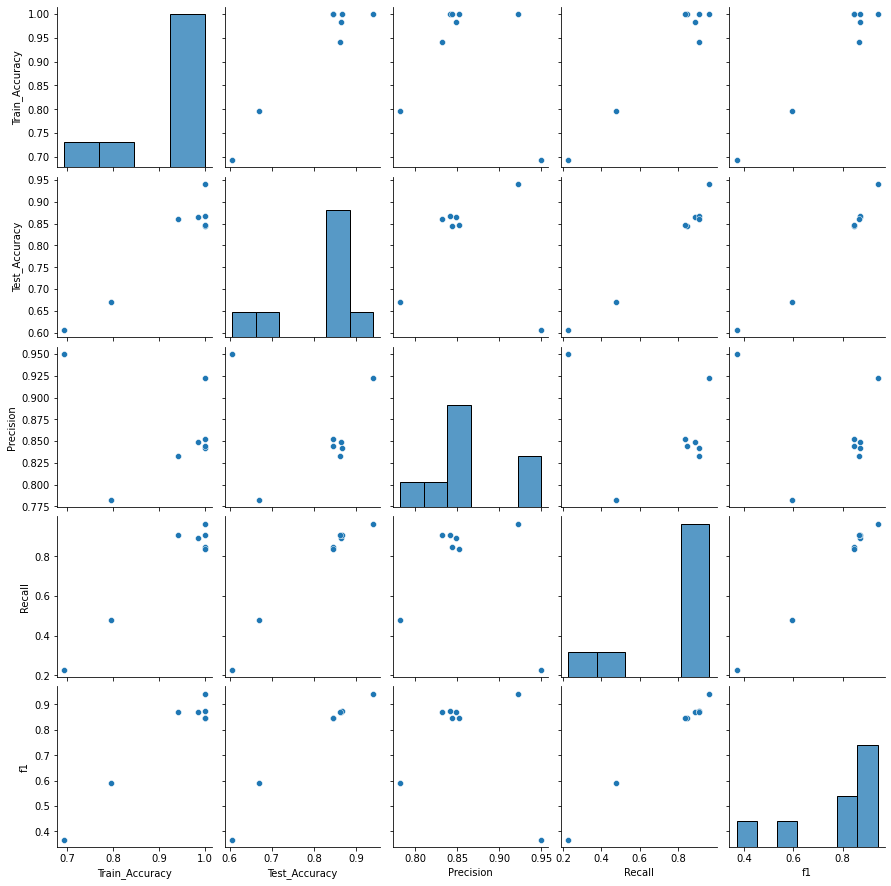

In [ ]:
sns.pairplot(DF)

In [ ]:
DF.to_excel('/content/grieve/MyDrive/Colab Notebooks/tfidf N1.xlsx',sheet_name="aman",startrow=2,startcol=5)